In [157]:
import talib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cryptocmd import CmcScraper
from talib import abstract
from matplotlib.finance import candlestick2_ochl
from mpl_finance import candlestick_ohlc
from mpl_finance import volume_overlay

import plotly.plotly as py
import plotly.graph_objs as go
from datetime import datetime

In [16]:
import datetime

import matplotlib.dates as mdates

In [82]:
scraper = CmcScraper('BTC')
header, data = scraper.get_data()

In [83]:
data = pd.DataFrame(data, columns=header)

In [84]:
data.count()

Date          1851
Open          1851
High          1851
Low           1851
Close         1851
Volume        1851
Market Cap    1851
dtype: int64

In [85]:
data = data.iloc[::-1]

In [86]:
data = data.reset_index()

In [87]:
data = data.drop(["index"], axis = 1)

In [88]:
#data.set_index("Date", drop = True, inplace = True)

In [89]:
data.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-04-2013,135.30,135.98,132.10,134.21,,1500520000
1,29-04-2013,134.44,147.49,134.00,144.54,,1491160000
2,30-04-2013,144.00,146.93,134.05,139.00,,1597780000
3,01-05-2013,139.00,139.89,107.72,116.99,,1542820000
4,02-05-2013,116.38,125.60,92.28,105.21,,1292190000


In [139]:
# sma
sma_close = talib.SMA(data.iloc[:, 4], timeperiod = 12)

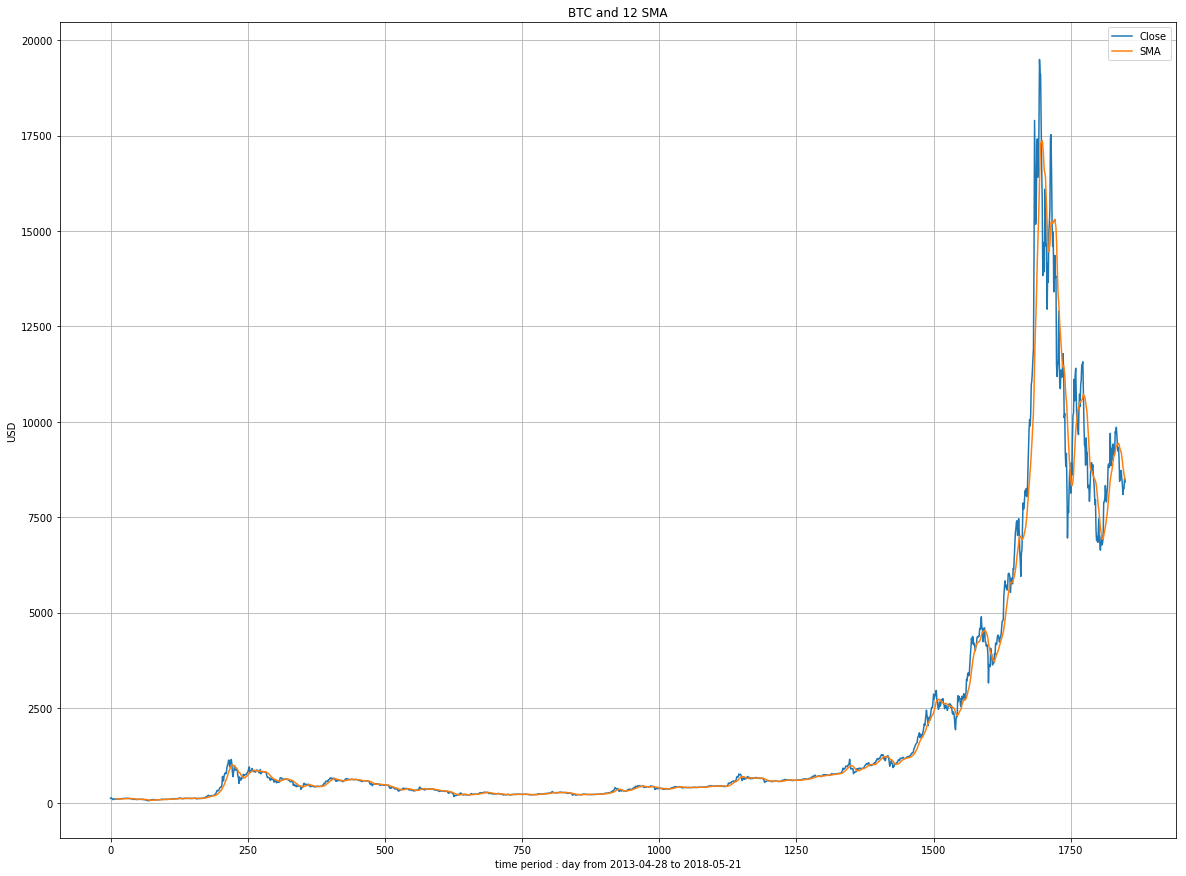

In [85]:
plt.figure(figsize=(20, 15))
plt.plot(data.iloc[:,4], label = "Close")
plt.plot(sma_close[:], label = "SMA")
plt.legend(loc = "best")
plt.grid(True)
plt.title("BTC and 12 SMA")
plt.xlabel("time period : day from 2013-04-28 to 2018-05-21")
plt.ylabel("USD")
#plt.savefig("/Users/david_chen/Desktop/Return_of_Top_10_Cryptocurrencies and Cap-30.png")
plt.show()

In [99]:
# Bollinger
upper, middle, lower = talib.BBANDS(data.iloc[:, 4], matype=talib.MA_Type.T3)

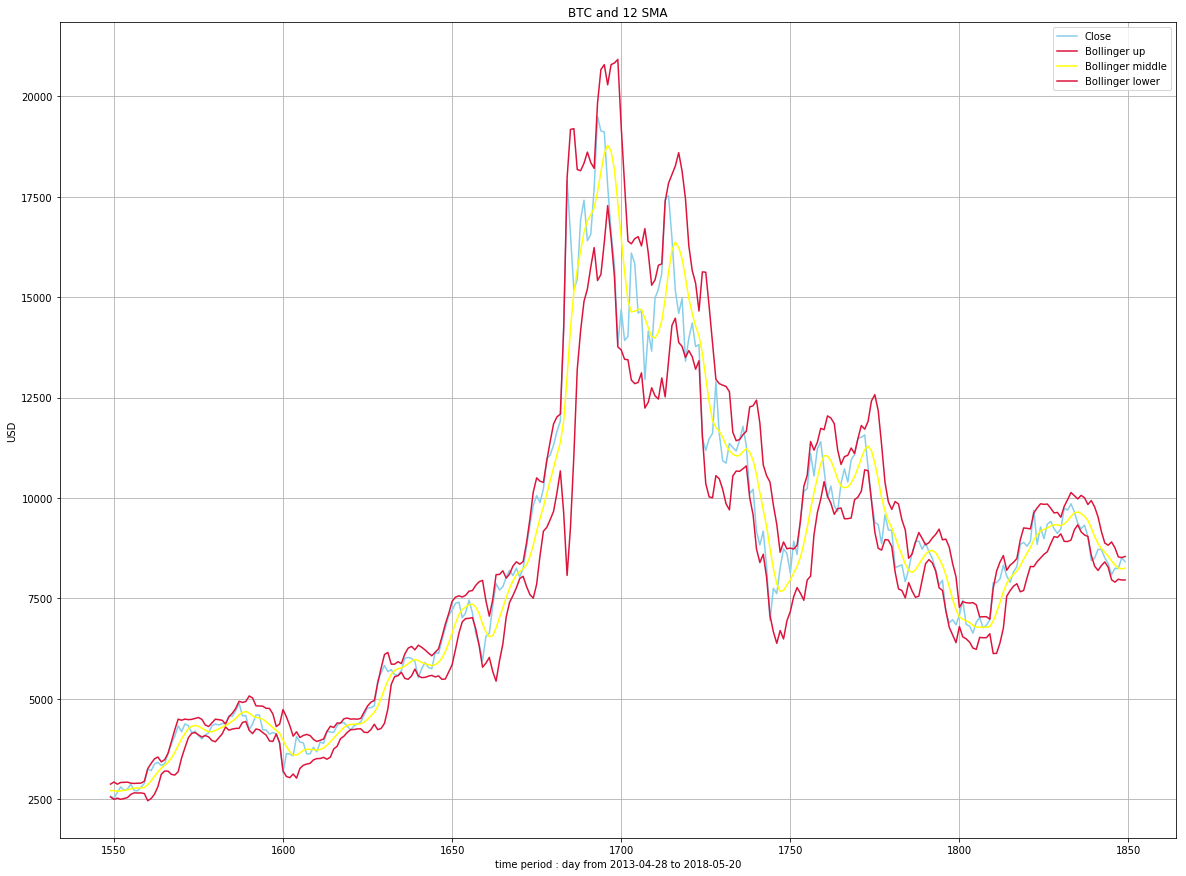

In [100]:
plt.figure(figsize=(20, 15))
plt.plot(data.iloc[1549:,4], label = "Close", color = "skyblue")
plt.plot(upper[1549:], label = "Bollinger up", color = "crimson")
plt.plot(middle[1549:], label = "Bollinger middle", color = "yellow")
plt.plot(lower[1549:], label = "Bollinger lower", color = "crimson")
plt.legend(loc = "best")
plt.grid(True)
plt.title("BTC and 12 SMA")
plt.xlabel("time period : day from 2013-04-28 to 2018-05-20")
plt.ylabel("USD")
#plt.savefig("/Users/david_chen/Desktop/Return_of_Top_10_Cryptocurrencies and Cap-30.png")
plt.show()

In [88]:
# momentum
momentum = talib.MOM(data.iloc[:, 4], timeperiod=5)

# abstract function

In [103]:
ohlcv = {
    'open': data.iloc[:, 1],
    'high': data.iloc[:, 2],
    'low': data.iloc[:, 3],
    'close': data.iloc[:, 4],
    'volume' : data.iloc[:, 5]
}

In [90]:
# abstract function
sma = abstract.SMA
output = sma(ohlcv, timeperiod = 12)

In [91]:
BBANDS = abstract.BBANDS
STOCH = abstract.STOCH

In [92]:
# uses close prices (default)
output = sma(ohlcv, timeperiod=25)

# uses open prices
output = sma(ohlcv, timeperiod=25, price='open')

# uses close prices (default)
upper, middle, lower = BBANDS(ohlcv, 20, 2, 2)

# uses high, low, close (default)
slowk, slowd = STOCH(ohlcv, 5, 3, 0, 3, 0) # uses high, low, close by default

# uses high, low, open instead
slowk, slowd = STOCH(ohlcv, 5, 3, 0, 3, 0, prices=['high', 'low', 'open'])

# Supported indicator and function

In [55]:
print(talib.get_functions())

['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR',

In [57]:
print(talib.get_function_groups())

{'Cycle Indicators': ['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE'], 'Math Operators': ['ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM'], 'Math Transform': ['ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH'], 'Momentum Indicators': ['ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR'], 'Overlap Studies': ['BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA'], 'Pattern Recognition': ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHO

In [1]:
Indicator Groups:
Overlap Studies
Momentum Indicators
Volume Indicators
Volatility Indicators
Price Transform
Cycle Indicators
Pattern Recognition

Overlap Studies
BBANDS               Bollinger Bands
DEMA                 Double Exponential Moving Average
EMA                  Exponential Moving Average
HT_TRENDLINE         Hilbert Transform - Instantaneous Trendline
KAMA                 Kaufman Adaptive Moving Average
MA                   Moving average
MAMA                 MESA Adaptive Moving Average
MAVP                 Moving average with variable period
MIDPOINT             MidPoint over period
MIDPRICE             Midpoint Price over period
SAR                  Parabolic SAR
SAREXT               Parabolic SAR - Extended
SMA                  Simple Moving Average
T3                   Triple Exponential Moving Average (T3)
TEMA                 Triple Exponential Moving Average
TRIMA                Triangular Moving Average
WMA                  Weighted Moving Average

Momentum Indicators
ADX                  Average Directional Movement Index
ADXR                 Average Directional Movement Index Rating
APO                  Absolute Price Oscillator
AROON                Aroon
AROONOSC             Aroon Oscillator
BOP                  Balance Of Power
CCI                  Commodity Channel Index
CMO                  Chande Momentum Oscillator
DX                   Directional Movement Index
MACD                 Moving Average Convergence/Divergence
MACDEXT              MACD with controllable MA type
MACDFIX              Moving Average Convergence/Divergence Fix 12/26
MFI                  Money Flow Index
MINUS_DI             Minus Directional Indicator
MINUS_DM             Minus Directional Movement
MOM                  Momentum
PLUS_DI              Plus Directional Indicator
PLUS_DM              Plus Directional Movement
PPO                  Percentage Price Oscillator
* ROC                  Rate of change : ((price/prevPrice)-1)*100
ROCP                 Rate of change Percentage: (price-prevPrice)/prevPrice
ROCR                 Rate of change ratio: (price/prevPrice)
ROCR100              Rate of change ratio 100 scale: (price/prevPrice)*100
RSI                  Relative Strength Index
STOCH                Stochastic
STOCHF               Stochastic Fast
STOCHRSI             Stochastic Relative Strength Index
TRIX                 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
ULTOSC               Ultimate Oscillator
WILLR                Williams' %R

Volume Indicators
AD                   Chaikin A/D Line
ADOSC                Chaikin A/D Oscillator
OBV                  On Balance Volume

Cycle Indicators
HT_DCPERIOD          Hilbert Transform - Dominant Cycle Period
HT_DCPHASE           Hilbert Transform - Dominant Cycle Phase
HT_PHASOR            Hilbert Transform - Phasor Components
HT_SINE              Hilbert Transform - SineWave
HT_TRENDMODE         Hilbert Transform - Trend vs Cycle Mode

Price Transform
AVGPRICE             Average Price
MEDPRICE             Median Price
TYPPRICE             Typical Price
WCLPRICE             Weighted Close Price

Volatility Indicators
** ATR                  Average True Range
NATR                 Normalized Average True Range
TRANGE               True Range

Pattern Recognition
CDL2CROWS            Two Crows
* CDL3BLACKCROWS       Three Black Crows
* CDL3INSIDE           Three Inside Up/Down
CDL3LINESTRIKE       Three-Line Strike
* CDL3OUTSIDE          Three Outside Up/Down
CDL3STARSINSOUTH     Three Stars In The South
CDL3WHITESOLDIERS    Three Advancing White Soldiers
CDLABANDONEDBABY     Abandoned Baby
CDLADVANCEBLOCK      Advance Block
CDLBELTHOLD          Belt-hold
* CDLBREAKAWAY         Breakaway
CDLCLOSINGMARUBOZU   Closing Marubozu
CDLCONCEALBABYSWALL  Concealing Baby Swallow
CDLCOUNTERATTACK     Counterattack
CDLDARKCLOUDCOVER    Dark Cloud Cover
* CDLDOJI              Doji
* CDLDOJISTAR          Doji Star
CDLDRAGONFLYDOJI     Dragonfly Doji
CDLENGULFING         Engulfing Pattern
CDLEVENINGDOJISTAR   Evening Doji Star
CDLEVENINGSTAR       Evening Star
CDLGAPSIDESIDEWHITE  Up/Down-gap side-by-side white lines
CDLGRAVESTONEDOJI    Gravestone Doji
** CDLHAMMER            Hammer
** CDLHANGINGMAN        Hanging Man
CDLHARAMI            Harami Pattern
CDLHARAMICROSS       Harami Cross Pattern
CDLHIGHWAVE          High-Wave Candle
CDLHIKKAKE           Hikkake Pattern
CDLHIKKAKEMOD        Modified Hikkake Pattern
CDLHOMINGPIGEON      Homing Pigeon
CDLIDENTICAL3CROWS   Identical Three Crows
CDLINNECK            In-Neck Pattern
CDLINVERTEDHAMMER    Inverted Hammer
CDLKICKING           Kicking
CDLKICKINGBYLENGTH   Kicking - bull/bear determined by the longer marubozu
CDLLADDERBOTTOM      Ladder Bottom
CDLLONGLEGGEDDOJI    Long Legged Doji
CDLLONGLINE          Long Line Candle
CDLMARUBOZU          Marubozu
CDLMATCHINGLOW       Matching Low
CDLMATHOLD           Mat Hold
CDLMORNINGDOJISTAR   Morning Doji Star
CDLMORNINGSTAR       Morning Star
CDLONNECK            On-Neck Pattern
CDLPIERCING          Piercing Pattern
CDLRICKSHAWMAN       Rickshaw Man
CDLRISEFALL3METHODS  Rising/Falling Three Methods
CDLSEPARATINGLINES   Separating Lines
CDLSHOOTINGSTAR      Shooting Star
CDLSHORTLINE         Short Line Candle
CDLSPINNINGTOP       Spinning Top
CDLSTALLEDPATTERN    Stalled Pattern
CDLSTICKSANDWICH     Stick Sandwich
CDLTAKURI            Takuri (Dragonfly Doji with very long lower shadow)
CDLTASUKIGAP         Tasuki Gap
CDLTHRUSTING         Thrusting Pattern
CDLTRISTAR           Tristar Pattern
CDLUNIQUE3RIVER      Unique 3 River
CDLUPSIDEGAP2CROWS   Upside Gap Two Crows
CDLXSIDEGAP3METHODS  Upside/Downside Gap Three Methods

SyntaxError: invalid syntax (<ipython-input-1-56f4d801512c>, line 1)

In [90]:
# convert str to datetime
for num in range(data.count()[0]):
    data.iloc[num, 0] = datetime.datetime.strptime(data.iloc[num, 0], '%d-%m-%Y')

In [94]:
type(data.iloc[0, 0])

datetime.datetime

In [138]:
cdldoji[1500:1550].shape[0]

50

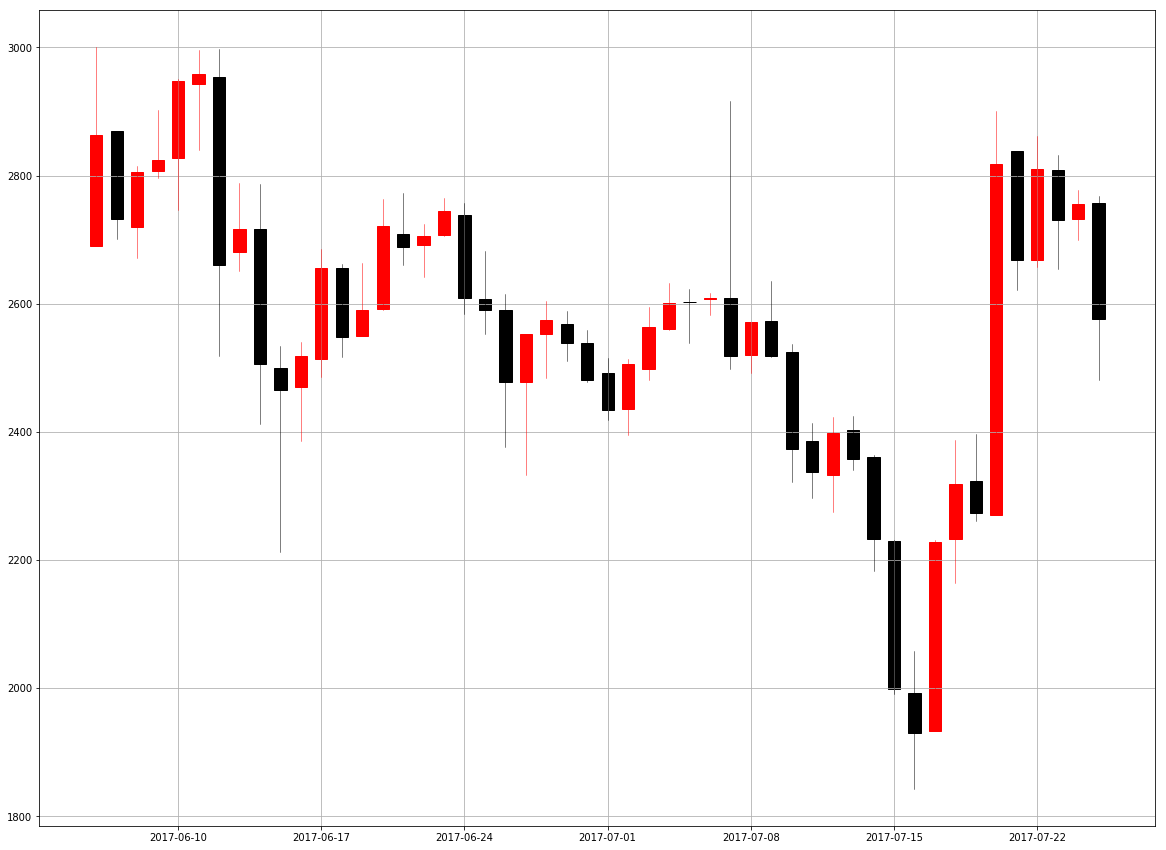

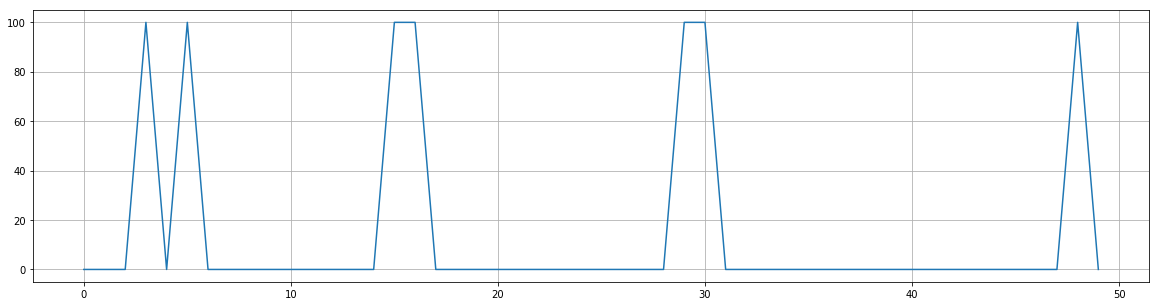

In [174]:
fig , ax = plt.subplots(figsize = (20,15))
candlestick_ohlc(ax, quotes = zip(mdates.date2num(data.iloc[1500:1550, 0]), data.iloc[1500:1550, 1], 
                                  data.iloc[1500:1550, 2], data.iloc[1500:1550, 3], data.iloc[1500:1550, 4], 
                                  data.iloc[1500:1550, 5], data.iloc[1500: 1550, 6],), width = 0.6, colorup = "RED",
                 colordown = "BLACK")

plt.grid(True)
#volume_overlay(ax, opens = data.iloc[1500:1550, 1], closes = data.iloc[1500:1550, 4], volumes = data.iloc[1500:1550, 5]
#              , width = 0.6)
fig2, ax2 = plt.subplots(figsize = (20,5))
plt.plot(cdldoji[1500:1550])

plt.grid(True)


#for num in range(cdldoji[1500:1550].shape[0]):
#    if cdldoji[1500]
    

ax.xaxis_date()
ax.autoscale_view()
plt.show()

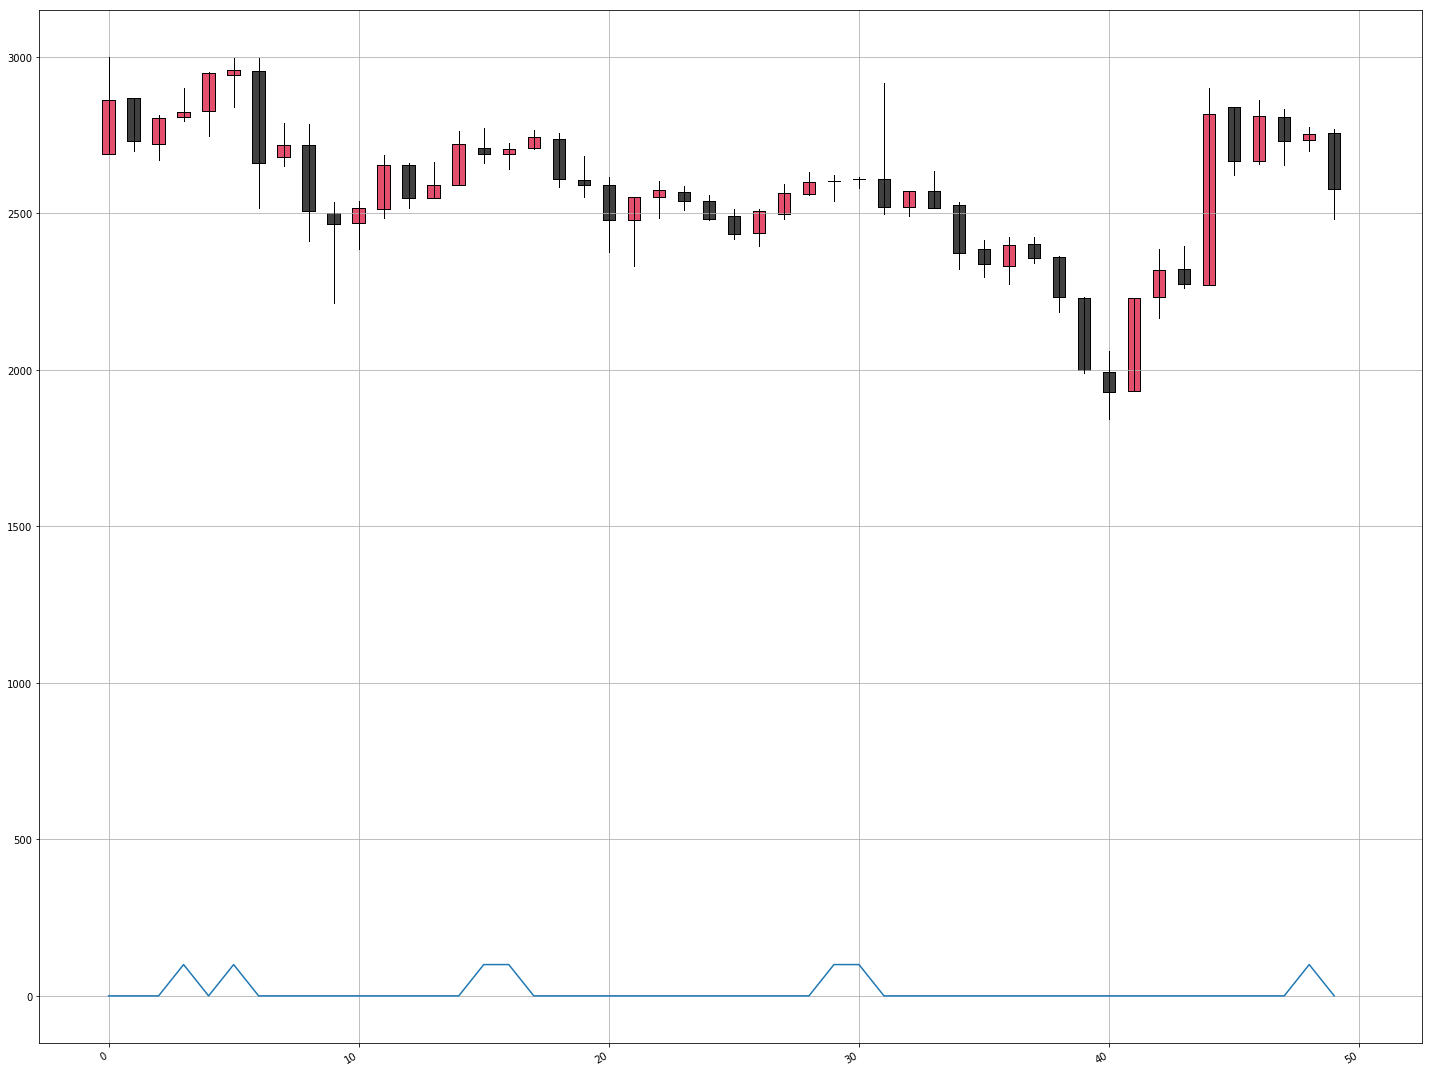

In [153]:
fig, ax = plt.subplots(figsize = (20,15))
candlestick2_ochl(ax, data.iloc[1500:1550,1], data.iloc[1500:1550, 4], data.iloc[1500:1550, 2], 
                  data.iloc[1500:1550, 3], width= 0.5, colorup = "crimson", colordown = "black")
plt.plot(cdldoji[1500:1550])
plt.grid(True)
fig.autofmt_xdate()
fig.tight_layout()
plt.show()

In [104]:
CDL3BLACKCROWS = abstract.CDL3BLACKCROWS
cdl3blackcrows = CDL3BLACKCROWS(ohlcv)

In [105]:
for num in cdl3blackcrows:
    print(num)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [106]:
CDL3INSIDE = abstract.CDL3INSIDE
cdl3inside = CDL3INSIDE(ohlcv)

In [107]:
for num in cdl3inside:
    print(num)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

In [108]:
CDL3OUTSIDE = abstract.CDL3OUTSIDE
cdl3outside = CDL3OUTSIDE(ohlcv)

In [109]:
for num in cdl3outside:
    print(num)

0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
-100
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
100
0
-100
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
100
0
-100
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-10

In [110]:
CDLBREAKAWAY = abstract.CDLBREAKAWAY
cdlbreakaway = CDLBREAKAWAY(ohlcv)

In [111]:
for num in cdlbreakaway:
    print(num)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [112]:
CDLDOJI = abstract.CDLDOJI
cdldoji = CDLDOJI(ohlcv)

In [113]:
for num in cdldoji:
    print(num)

0
0
0
0
0
0
0
0
0
0
0
100
0
0
100
0
0
0
0
0
100
0
100
0
0
0
0
0
0
0
0
0
0
100
100
0
100
0
100
0
0
0
0
0
0
100
0
0
100
100
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
100
100
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
100
0
100
0
100
100
0
100
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
100
100
0
0
100
0
0
0
0
100
0
0
0
0
100
0
0
0
100
100
0
100
0
100
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
100
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
100
0
0
100
0
0
0
0
0
0
0
0
100
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
100
0
100
100
0
0
0
0
0
100
0
0
0
0
0
0
0
100
100
0
0
0
100
0
100
0
100
0
0
0
0
100
100
100
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
100
0
100
0
0
0
0
0
100
0
0
0
0
0
0
0
100
100
0
100
0
0
0
0
0
0
100
0
0
0
100
100
0
0
100
0
0
0
0
100
0
0
100
100
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
100
0
0
0
0
0
0
0
100
0
100
0
0
100
0
0
0
0


In [114]:
CDLDOJISTAR = abstract.CDLDOJISTAR
cdldojistar = CDLDOJISTAR(ohlcv)

In [115]:
for num in cdldojistar:
    print(num)

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [116]:
CDLHAMMER = abstract.CDLHAMMER
cdlhammer = CDLHAMMER(ohlcv)

In [117]:
for num in cdlhammer:
    print(num)

0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


In [118]:
CDLHANGINGMAN = abstract.CDLHANGINGMAN
cdlhangingman = CDLHANGINGMAN(ohlcv)

In [119]:
for num in cdlhangingman:
    print(num)

0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
-100
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0

In [120]:
ATR = abstract.ATR
atr = ATR(ohlcv, timeperiod = 14)

In [121]:
for num in atr:
    print(num)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
15.67357142857143
14.8540306122449
14.475171282798836
14.320516191170347
13.76619360608675
13.406465491366268
12.65957509912582
12.107462592045406
11.492643835470734
10.799597847222824
10.171055143849765
9.718122633574783
9.604685302605153
9.227207780990499
8.952407225205464
9.08223528054793
8.789218474794508
8.513560012309187
8.284020011429961
7.942304296327821
7.559282560875834
8.044333806527561
7.934024248918449
7.70587965970999
7.410459684016419
7.298998278015246
7.676212686728442
7.427911780533553
8.360918081924014
8.842281076072299
8.610689570638563
8.357068887021523
8.457992537948558
8.332421642380805
8.14439152506789
7.751934987563041
7.427511059879966
7.616974555602825
7.3921906587740525
7.349891326004477
7.3463276598613
6.996589969871207
6.680404972023263
6.728233188307315
6.637645103428221
6.356384738897632
6.109500114690659
6.345250106498469
6.391303670320006
6.213353408154292
6.5809710218575574
6.453044520296302
6.992

182.65721200720847
173.87883972097933
173.9410654551951
170.81241792268116
175.6801023567754
178.80723790272003
174.57529233824002
167.70205717122286
161.49619594470695
156.82075337722787
154.15069956456873
151.320649595671
145.6720317674088
141.27402949830818
133.685170248429
153.94122951639835
148.5904274080842
146.39825402179244
151.37195016309298
148.8925251514435
148.86948764062612
144.26380995200995
146.81853781258067
153.6836422545392
158.1162392363578
168.29865071947512
172.19446138236978
169.67628556934338
202.614408028676
203.6105217409134
203.68905590227675
201.87126619497124
193.02831860961618
199.74915299464357
196.90707063788332
194.55513702089166
196.77762723368508
191.0227967169933
185.49831123720807
184.32057472026463
187.9933908116743
181.2752914679833
177.48205636312736
175.91976662290398
193.00978329269657
189.0583702003611
191.03920090033532
187.3235436931685
186.44971914365647
182.70188206196673
191.62317620039767
201.95152075751213
212.5685549891184
221.382943918

In [122]:
ROC = abstract.ROC
roc = ROC(ohlcv, timeperiod =14)

In [123]:
for num in roc:
    print(num)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
-14.313389464272419
-18.375536183755358
-19.784172661870503
-2.3677237370715365
12.879003896967989
25.851662404092068
9.777777777777775
5.245449055301532
8.637577916295648
10.206278026905835
9.086906753544067
12.452294310819202
13.651877133105783
14.526206178410273
16.06956521739129
9.976267163926078
15.695067264573993
15.829101733496763
8.454024924216919
4.860998211672896
4.696356275303648
0.24592179686859783
0.1803278688524479
-1.188151041666663
-1.808055533134223
-6.866614048934494
-16.291291291291287
-17.94211244127898
-25.082409349715306
-18.034682080924856
-15.581395348837201
-18.253968253968257
-19.254658385093173
-22.496124031007746
-22.66821345707658
-18.627851827622866
-16.789396170839467
-11.546697413935103
-11.01520756267982
-6.652542372881354
-1.7937219730941756
0.0
7.5999999999999845
-3.394452280206861
-4.545454545454552
-3.8372630605640334
-2.4615384615384595
-5.331066213242641
-5.000500050004996
-2.9142799718621326

4.7416982014541365
1.6281242896950099
5.308601416862513
5.019045485099705
6.72376017394638
12.69584701696771
12.75673638590542
12.730699689557534
13.944071550543558
19.070951746781574
19.90228362507942
23.118426162324734
25.10739740293555
27.28202610367825
28.17952277727711
32.26447759710407
37.85145782506098
38.70990683450679
39.50182658381991
40.2844285248116
30.97350510452115
36.55043539442726
34.20308778906289
22.28685987619585
19.38505802508226
23.42140407626385
22.8254436907789
27.790028609084196
32.04522422092728
27.83786661322345
26.114834479357075
32.19054780785709
36.73543614622326
24.689895432685805
27.732798218345465
12.962419178795614
19.176741794782505
29.7498317447352
25.42708063074748
24.322898824962348
27.49212400391814
25.196834548299307
20.655912276409882
23.05555555555554
23.622434894635134
23.391454995216378
11.806976477713583
21.719928155558833
28.213964638897203
44.575671818213046
37.21634659987012
17.911784395352036
24.89347129585793
9.620321814547705
2.35476851

In [163]:
pow(12622.312, 1/500)

1.0190659196122849

In [164]:
pow(6597, 1/500)

1.0177443333440657